# Loading data for the energy consumption 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

In [4]:
data=pd.read_csv('energy consumption.csv')

In [5]:
data

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133
...,...,...
964,05/2019,91.9046
965,06/2019,98.4397
966,07/2019,112.9469
967,08/2019,111.6645


In [6]:
data['DATE']=pd.to_datetime(data['DATE'])
data.index=data['DATE']

In [134]:
data.tail()

,DATE,ENERGY_INDEX
DATE,,
2019-05-01,2019-05-01,91.9046
2019-06-01,2019-06-01,98.4397
2019-07-01,2019-07-01,112.9469
2019-08-01,2019-08-01,111.6645
2019-09-01,2019-09-01,102.2911


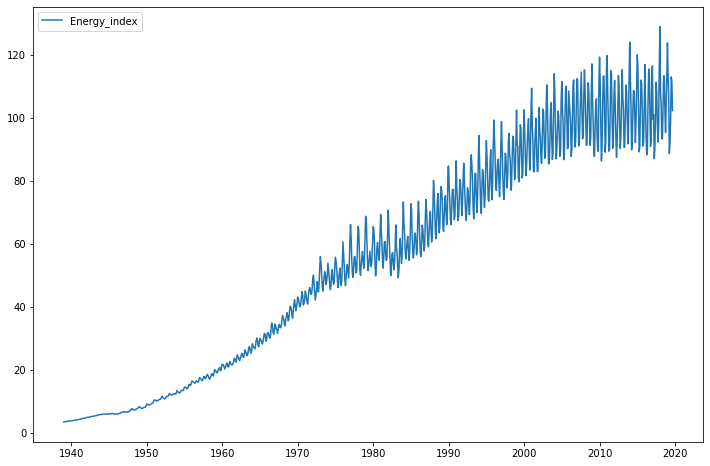

In [13]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data['ENERGY_INDEX'],label='Energy_index')
plt.legend(loc='best')
plt.show()

In [14]:
#decompose the timeseries data in diff component

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decomposed_timeseries=seasonal_decompose(data['ENERGY_INDEX'])

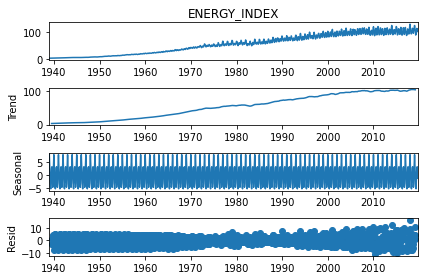

In [21]:
decomposed_timeseries.plot()
plt.show()

In [22]:
#Data contain trend,seasonal and residual component

<AxesSubplot:xlabel='DATE'>

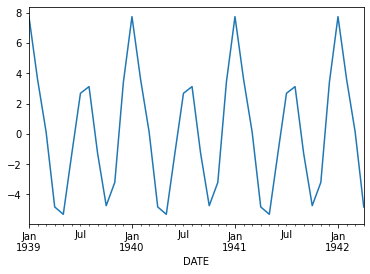

In [27]:
decomposed_timeseries.seasonal[0:40].plot()

*yearly seasonality

In [29]:
data['DATE'].max(),data['DATE'].min()

(Timestamp('2019-09-01 00:00:00'), Timestamp('1939-01-01 00:00:00'))

In [113]:
delta=data['DATE'].max()-data['DATE'].min()
delta

Timedelta('29463 days 00:00:00')

In [32]:
data['DATE'].shape

(969,)

In [115]:
delta/(969)

Timedelta('30 days 09:44:01.486068111')

In [34]:
969*.70

678.3

In [39]:
#train data sagragetion
train=data[:679]

In [40]:
#valid data
valid=data[679:]

In [41]:
#use triple exponential smoothening model for forecasting the consumption
from statsmodels.tsa.api import ExponentialSmoothing

In [126]:
model = ExponentialSmoothing(np.asarray(train['ENERGY_INDEX']) ,seasonal_periods=12 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.7, smoothing_slope=0.05, smoothing_seasonal=0.5) #

valid['Holt_Winter'] = fit1.forecast(len(valid)) 

/Users/sudeep/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-126-98e1ce51af72>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.7, smoothing_slope=0.05, smoothing_seasonal=0.5) #
<ipython-input-126-98e1ce51af72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Holt_Winter'] = fit1.forecast(len(valid))


In [109]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': 0.05,
 'smoothing_seasonal': 0.5,
 'damping_trend': nan,
 'initial_level': 32.82113490109299,
 'initial_trend': 0.16277596851202977,
 'initial_seasons': array([0.10398974, 0.10802104, 0.11091776, 0.11023988, 0.10636292,
        0.10247367, 0.09666932, 0.09286302, 0.09263032, 0.0927942 ,
        0.09530651, 0.09767788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

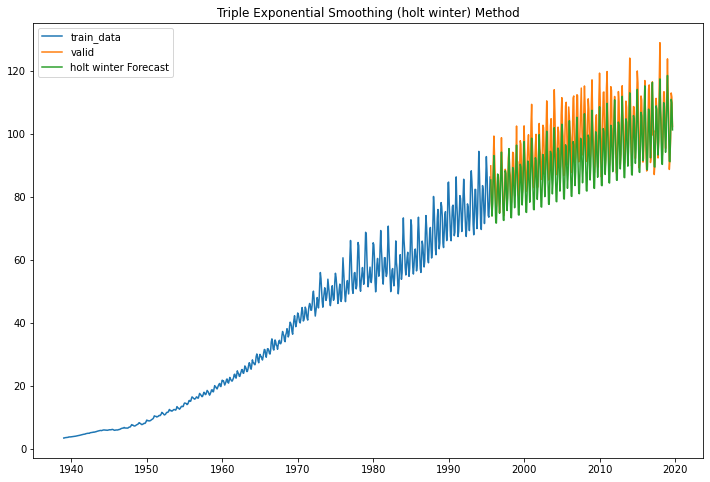

In [110]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['ENERGY_INDEX'], label='train_data')
plt.plot(valid.index,valid['ENERGY_INDEX'], label='valid')
plt.plot(valid.index,valid['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [125]:
#calculate rmse
rmse = sqrt(mean_squared_error(valid['ENERGY_INDEX'], valid['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 6.882176336705648


In [121]:
#predict using the energy forecast for the further 3 years

In [144]:
 forecast = fit1.forecast(len(valid)+36)[len(valid):]

In [145]:
forecast

array([ 94.99383955,  99.95581019, 111.45535191, 119.61416057,
       110.46303169, 101.2360769 ,  92.12507236,  91.97146179,
       101.15565861, 111.94405264, 110.8083077 , 102.15923001,
        95.87449404, 100.88175003, 112.48702126, 120.72049729,
       111.4839408 , 102.17098963,  92.97519095,  92.81951074,
       102.08767689, 112.97468066, 111.82769724, 103.09833175,
        96.75514854, 101.80768988, 113.51869061, 121.82683402,
       112.50484991, 103.10590236,  93.82530954,  93.66755969,
       103.01969517, 114.00530868, 112.84708677, 104.03743348])

In [146]:
predict_range=pd.date_range(start='2019-10-01',periods=36,freq='MS')
predict_range

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

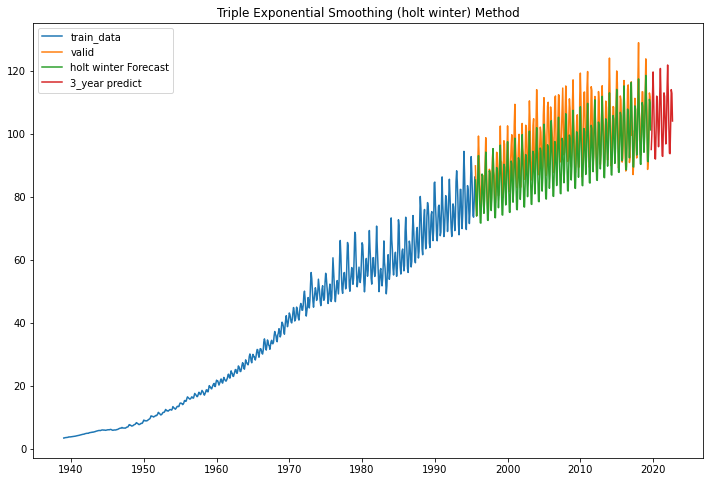

In [147]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['ENERGY_INDEX'], label='train_data')
plt.plot(valid.index,valid['ENERGY_INDEX'], label='valid')
plt.plot(valid.index,valid['Holt_Winter'], label='holt winter Forecast')
plt.plot(predict_range,forecast,label='3_year predict')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

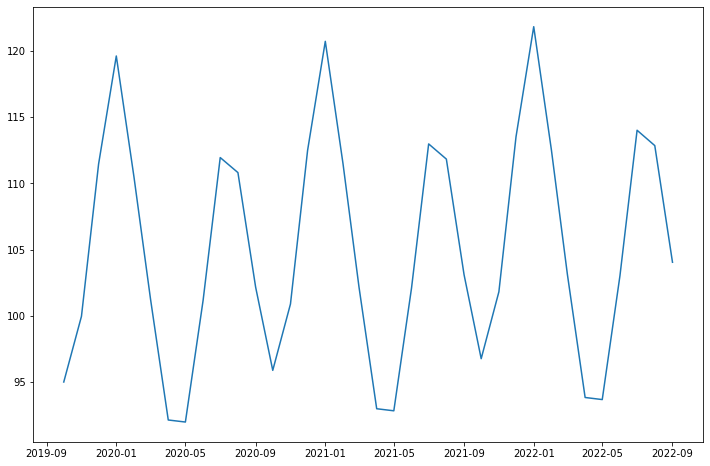

In [149]:
plt.figure(figsize=(12,8))
plt.plot(predict_range,forecast,label='3_year predict')